# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Регрессия и классификация. <font color="blue"><i>Легкая часть</i></font>


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 6 баллов
* Задача 3 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 2 балла
* Задача 5 &mdash; 5 баллов
* Задача 6 &mdash; 5 баллов
* Задача 7 &mdash; 3 балла

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*. Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">ноутбук</a> с лекции про закон больших чисел. За использование циклов оценка может быть существенно снижена.

**a).** Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$
Обратите внимание, что нужно взять теоретические математическое ожидание и дисперсию, а не вычислять их по выборке.

In [5]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

In [9]:
k = 500
n = 300
counts = np.arange(1, n + 1)

def samples(dist):
    samples = dist.rvs(size=(k, n))
    sums = np.cumsum(samples, axis=1)

    mean, variance = dist.stats(moments="mv")

    means = mean * counts
    deviations = (variance * counts) ** 0.5

    return (sums - means) / deviations

In [10]:
results = samples(sps.expon)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

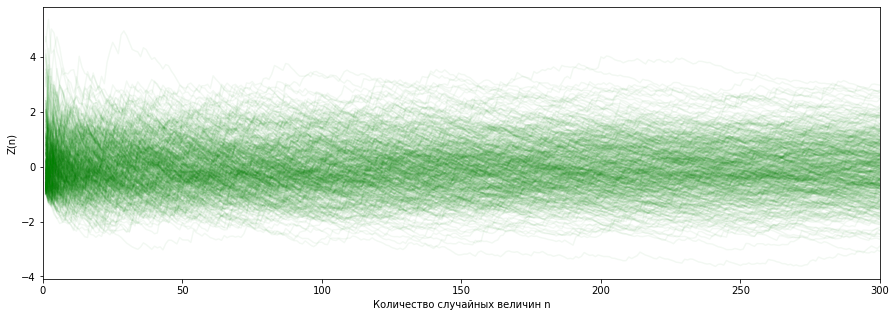

In [11]:
plt.figure(figsize=(15, 5))

for j in range(k):
    plt.plot(counts, results[j], color="green", alpha=0.05)

plt.xlim((0, n))
plt.xlabel("Количество случайных величин n")
plt.ylabel("Z(n)")
plt.show()

К константе значения не сходятся.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду.

In [12]:
norm = sps.norm
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)

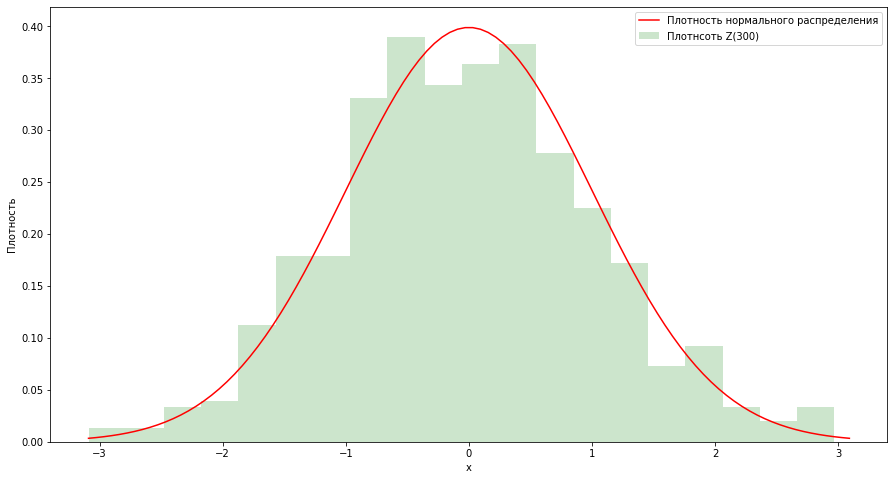

In [13]:
plt.figure(figsize=(15, 8))

plt.plot(x, norm.pdf(x), color="red", label="Плотность нормального распределения")
plt.hist(results[:,-1], bins=20, density=True, color="green", alpha=0.2, label="Плотнсоть Z(300)")

plt.ylabel("Плотность")
plt.xlabel("x")
plt.legend()

Действительно, очень похоже на нормальное.

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

In [14]:
results = samples(sps.uniform)

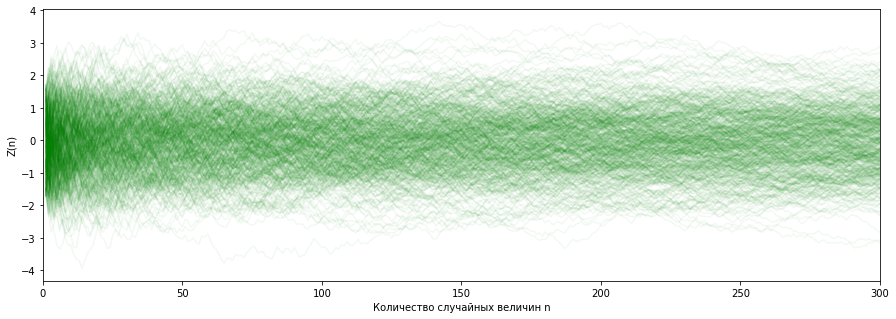

In [15]:
plt.figure(figsize=(15, 5))

for j in range(k):
    plt.plot(counts, results[j], color="green", alpha=0.05)

plt.xlim((0, n))
plt.xlabel("Количество случайных величин n")
plt.ylabel("Z(n)")
plt.show()

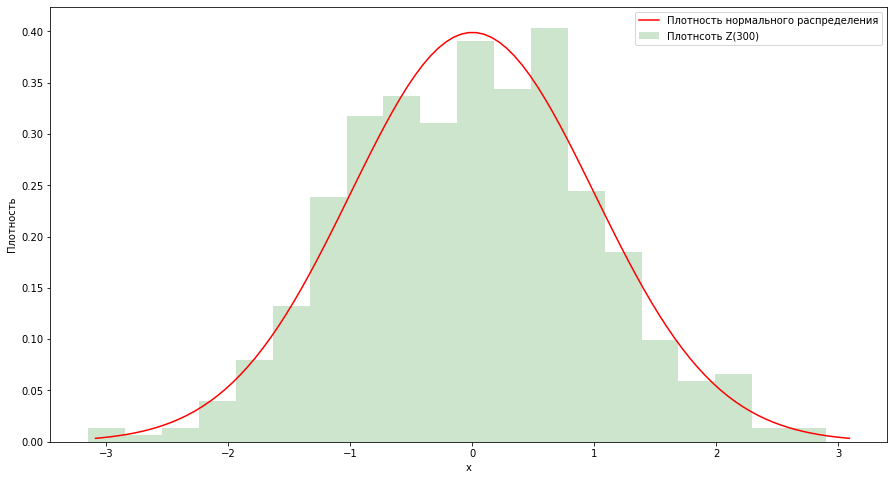

In [16]:
plt.figure(figsize=(15, 8))

plt.plot(x, norm.pdf(x), color="red", label="Плотность нормального распределения")
plt.hist(results[:,-1], bins=20, density=True, color="green", alpha=0.2, label="Плотнсоть Z(300)")

plt.ylabel("Плотность")
plt.xlabel("x")
plt.legend()

In [18]:
results = samples(sps.poisson(mu=1))

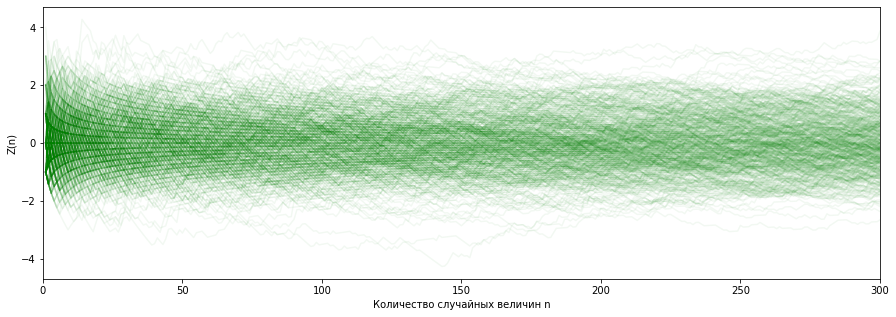

In [20]:
plt.figure(figsize=(15, 5))

for j in range(k):
    plt.plot(counts, results[j], color="green", alpha=0.05)

plt.xlim((0, n))
plt.xlabel("Количество случайных величин n")
plt.ylabel("Z(n)")
plt.show()

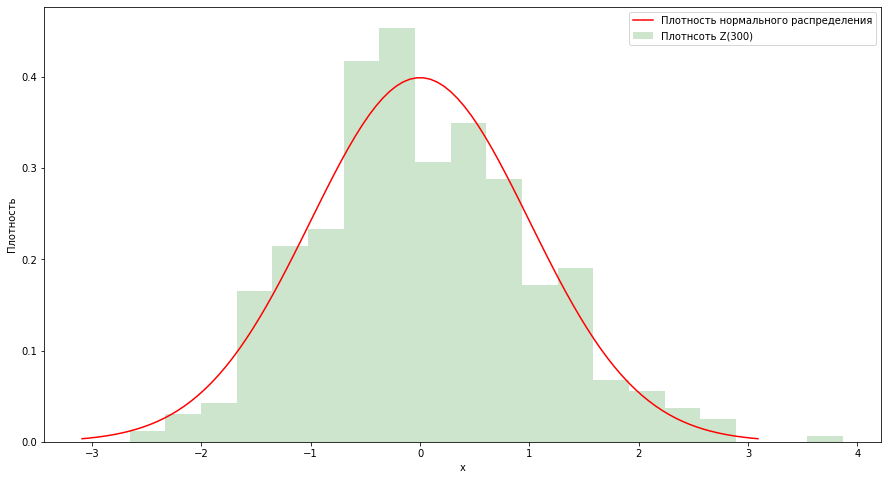

In [21]:
norm = sps.norm
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)

plt.figure(figsize=(15, 8))

plt.plot(x, norm.pdf(x), color="red", label="Плотность нормального распределения")
plt.hist(results[:,-1], bins=20, density=True, color="green", alpha=0.2, label="Плотнсоть Z(300)")

plt.ylabel("Плотность")
plt.xlabel("x")
plt.legend()

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Рекомендуем также посмотреть <a target="_blank" href="https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm">интерактивную визуализацию</a>.

Смысл центральной предельной теоремы в том, что при достаточно большой выборке сумма случайных величин распределена 

### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок по городу на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов в ряде городов США. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

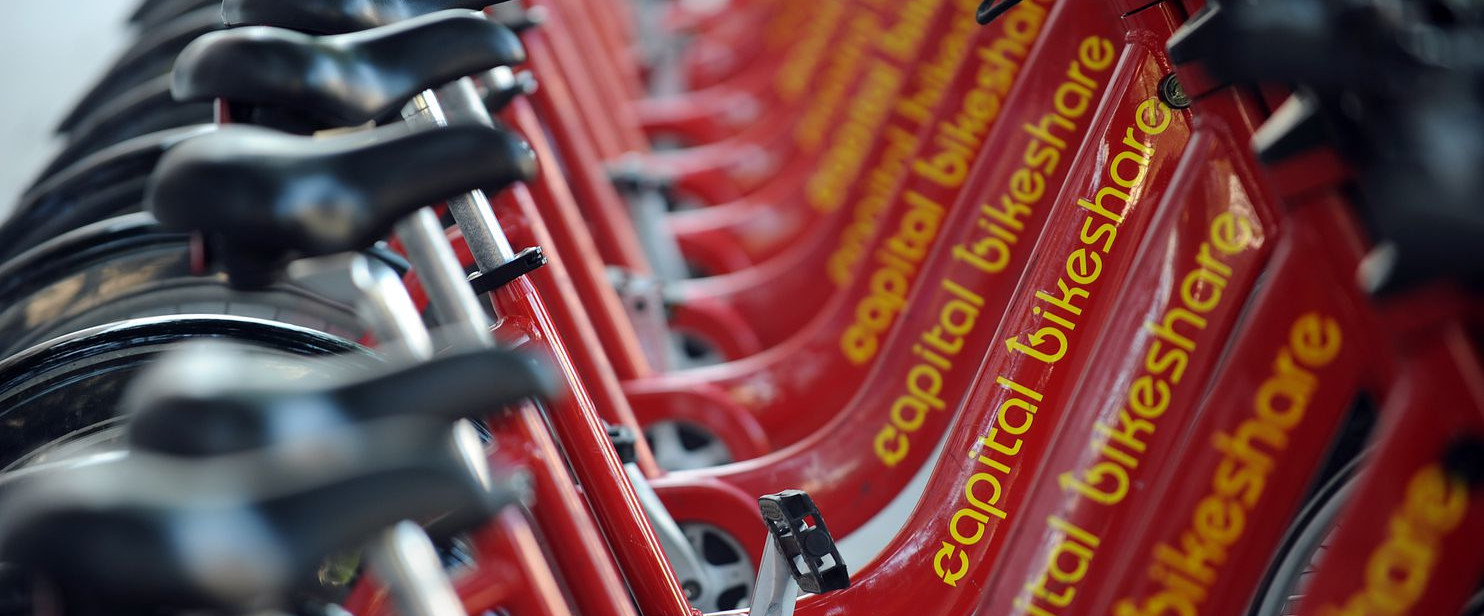

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

Посмотрите по графикам, как целевой признак зависит от остальных и поймите характер зависимости целевого признака от остальных. 

Какие признаки категориальные, а какие &mdash; вещественные? Что нужно сделать с категориальными признаками? Выполните это. При необходимости можно сделать несложную обработку вещественных признаков.

Обучите линейную регрессию из `sklearn` на наших данных и посмотрите на полученные оценки коэффициентов.

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Сделайте выводы.

### Задача 3.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
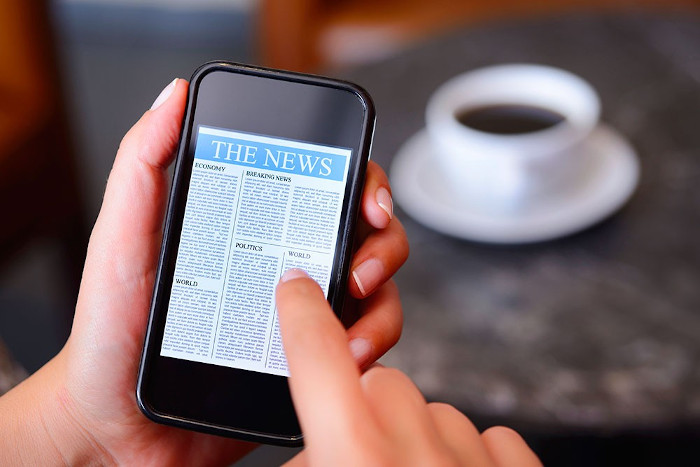



Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [197]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [ ]:
print(data_train['data'][21])

Индекс тематической группы для каждого сообщения

In [ ]:
data_train['target']

Названия тематических групп

In [ ]:
data_train['target_names']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Посчитайте качество на тестовой выборке.

Сделайте выводы.

### <font color="orange"><i>Сложная часть</i></font>

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.